In [4]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
sample_size = 10000
sample = np.array([np.random.binomial(1, 0.5) for _ in range(sample_size)])
head_count = sample.sum()
head_count_frequency = head_count / sample_size
assert head_count_frequency == sample.mean()

In [2]:
np.random.seed(0)
frequencies = np.random.binomial(sample_size, 0.5, 100000) / sample_size

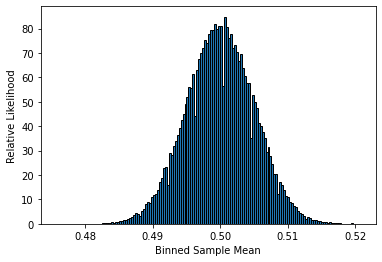

In [5]:
sample_means = frequencies
likelihoods, bin_edges, _ = plt.hist(sample_means, bins='auto',edgecolor='black', density=True)
plt.xlabel('Binned Sample Mean')
plt.ylabel('Relative Likelihood')
plt.show()

In [10]:
mean_normal = np.average(bin_edges[:-1], weights=likelihoods)
var_normal = weighted_variance(bin_edges[:-1], likelihoods)
std_normal = var_normal ** 0.5
print(f"Mean is approximately {mean_normal:.2f}")
print(f"Standard deviation is approximately {std_normal:.3f}")

Mean is approximately 0.50
Standard deviation is approximately 0.005


In [9]:
def squared_distance(value1, value2):
    return (value1 - value2) ** 2

def sum_of_squared_distances(value, measurements):
    return sum(squared_distance(value, m) for m in measurements)

def weighted_variance(data, weights):

    mean = np.average(data, weights=weights)
    squared_distances = [squared_distance(value, mean) for value in data]
    return np.average(squared_distances, weights=weights)
assert weighted_variance([75, 77], [9, 1]) == np.var(9 * [75] + [77])

In [11]:
import math
peak_x_value = bin_edges[likelihoods.argmax()]
print(f"Mean is approximately {peak_x_value:.2f}")
peak_y_value = likelihoods.max()
std_from_peak = (peak_y_value * (2* math.pi) ** 0.5) ** -1
print(f"Standard deviation is approximately {std_from_peak:.3f}")

Mean is approximately 0.50
Standard deviation is approximately 0.005


In [15]:
from scipy import stats

In [16]:
fitted_mean, fitted_std = stats.norm.fit(sample_means)
print(f"Mean is approximately {fitted_mean:.2f}")
print(f"Standard deviation is approximately {fitted_std:.3f}")

Mean is approximately 0.50
Standard deviation is approximately 0.005


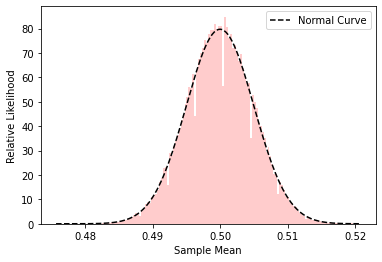

In [17]:
normal_likelihoods = stats.norm.pdf(bin_edges, fitted_mean, fitted_std)
plt.plot(bin_edges, normal_likelihoods, color='k', linestyle='--',label='Normal Curve')
plt.hist(sample_means, bins='auto', alpha=0.2, color='r', density=True)
plt.legend()
plt.xlabel('Sample Mean')
plt.ylabel('Relative Likelihood')
plt.show()

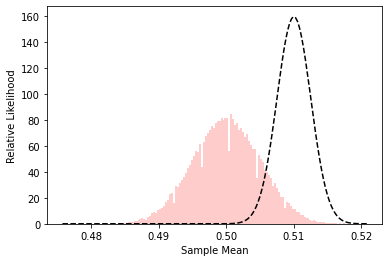

In [18]:
adjusted_likelihoods = stats.norm.pdf(bin_edges, fitted_mean + 0.01,
fitted_std / 2)
plt.plot(bin_edges, adjusted_likelihoods, color='k', linestyle='--')
plt.hist(sample_means, bins='auto', alpha=0.2, color='r', density=True)
plt.xlabel('Sample Mean')
plt.ylabel('Relative Likelihood')
plt.show()

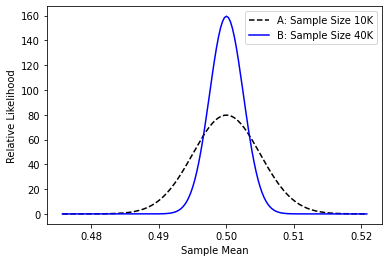

In [19]:
np.random.seed(0)
new_sample_size = 40000
new_head_counts = np.random.binomial(new_sample_size, 0.5, 100000)
new_mean, new_std = stats.norm.fit(new_head_counts / new_sample_size)
new_likelihoods = stats.norm.pdf(bin_edges, new_mean, new_std)
plt.plot(bin_edges, normal_likelihoods, color='k', linestyle='--',
label='A: Sample Size 10K')
plt.plot(bin_edges, new_likelihoods, color='b', label='B: Sample Size 40K')
plt.legend()
plt.xlabel('Sample Mean')
plt.ylabel('Relative Likelihood')
plt.show()